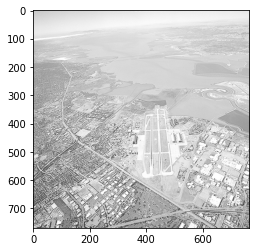

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
img = cv2.imread("Image/Fig0309(a)(washed_out_aerial_image).tif")
plt.imshow(img, cmap="gray")

In [71]:
angle=30


In [77]:
nearest_neighbour_rotate = nearest_neighbour(img, angle)


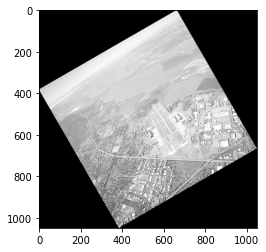

In [78]:
plt.imshow(nearest_neighbour_rotate, cmap="gray")

In [35]:
from matplotlib import image as img
import numpy as np

import math


In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
m = img.imread("Image/Fig0309(a)(washed_out_aerial_image).tif")

In [37]:
m.shape

(769, 765)

In [38]:
def Nearest_Neighbor(img, angle):
    m, n = img.shape
    mm = round(m*math.sqrt(2))
    print(mm)
    nn = round(n*math.sqrt(2))
    newImage = np.zeros((mm, nn))
    for t in range(1, mm):
        for s in range(1, nn):
            i = (t-mm/2)*math.cos(angle*math.pi/180) + (s-nn/2)*math.sin(angle*math.pi/180) + mm/2
            j = -(t-mm/2)*math.sin(angle*math.pi/180) + (s-nn/2)*math.cos(angle*math.pi/180) + nn/2
            if i >= 0 and i < m and j >= 0 and j < n:
                newImage[int(t), int(s)] = img[int(i), int(j)]
    return newImage
    
    
    

In [39]:
newImage = Nearest_Neighbor(m, 30)

1088


In [31]:
m.shape

(769, 765)

In [30]:
newImage.shape

(1088, 1082)

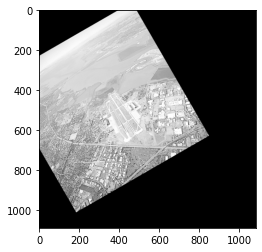

In [40]:
plt.imshow(newImage, cmap="gray")